In [3]:
import pandas as pd
f = open("bilim.txt",encoding = 'utf-8')
df=f.read()

In [4]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt


In [5]:
df

'Bilim, neden, merak ve amaç besleyen fiziki evrenin deney, gözlem, düşünce aracılığıyla sistematik bir şekilde incelenmesini de kapsayan entelektüel ve pratik disiplinler bütünü.[1] Bilimin diğer tüm disiplinlerden en farklı karakteristiği, savunmalarını somut kanıtlarla sunmasıdır. Ve bu da bilimi en güvenilir bir disiplin olarak günümüze kadar birçok alt dala bölmüş, insanların daha iyi yaşam koşullarına kavuşmasına, bilinmeyen olguları bulmamıza ve yeni şeyler öğrenmemize önayak olmuştur. Tüm bilim dalları evrenin bir bölümünü kendine konu olarak seçer, deneysel yöntemlere ve gerçekliğe dayanarak yasalar çıkarmaya çalışır.[2] Einstein bilimi, her türlü düzenden yoksun duyu verileri ile düzenli düşünceler arasında uygunluk sağlama çabası,[3] Bertrand Russell ise gözlem ve gözleme dayalı akıl yürütme yoluyla dünyaya ilişkin olguları birbirine bağlayan yasaları bulma çabası[4] olarak tanımlar.\n\nYüzyıllardır insanlığın yeryüzündeki yaşama ortamına duyduğu merak, yaşam standartlarını 

In [6]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('turkish') 
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [7]:
words = basic_clean(df)


In [8]:
bigrams=nltk.ngrams(words,2)
bigramsFrequency=Counter(bigrams)
valuesOfBigrams=list(bigramsFrequency.values())
listOfbigrams=list(bigramsFrequency)

for x in range(0,len(listOfbigrams)):
    if(valuesOfBigrams[x]>5):
        print(listOfbigrams[x],"is used",valuesOfBigrams[x],"times")

('bir', 'şekilde') is used 13 times
('belirli', 'bir') is used 6 times
('önemli', 'bir') is used 17 times
('zaman', 'içinde') is used 6 times
('genel', 'olarak') is used 11 times
('bilim', 'insanı') is used 7 times
('bilim', 'felsefesi') is used 7 times
('yeni', 'bir') is used 8 times
('bir', 'bilim') is used 11 times
('ortaya', 'çıkmıştır') is used 8 times
('bilim', 'insanları') is used 8 times
('bir', 'yere') is used 7 times
('Orta', 'Çağda') is used 6 times
('19', 'yüzyılda') is used 7 times
('bilim', 'dalı') is used 7 times
('Her', 'kadar') is used 6 times
('20', 'yüzyılın') is used 7 times
('Buna', 'göre') is used 6 times
('Bilimsel', 'yöntem') is used 7 times


In [9]:
#(pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]


In [10]:
threegrams1 = nltk.ngrams(words, 3)
threegramsFrequency1 = Counter(threegrams1)
valuesofThreegrams1 = list(threegramsFrequency1.values())
threegramlist1 = list(threegramsFrequency1)

for x in range(0, len(threegramlist1)):
    if(valuesofThreegrams1[x] > 4):
        print(threegramlist1[x], " is used ", valuesofThreegrams1[x], " times")

('açısından', 'önemli', 'bir')  is used  5  times
('önemli', 'bir', 'yere')  is used  6  times


In [11]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

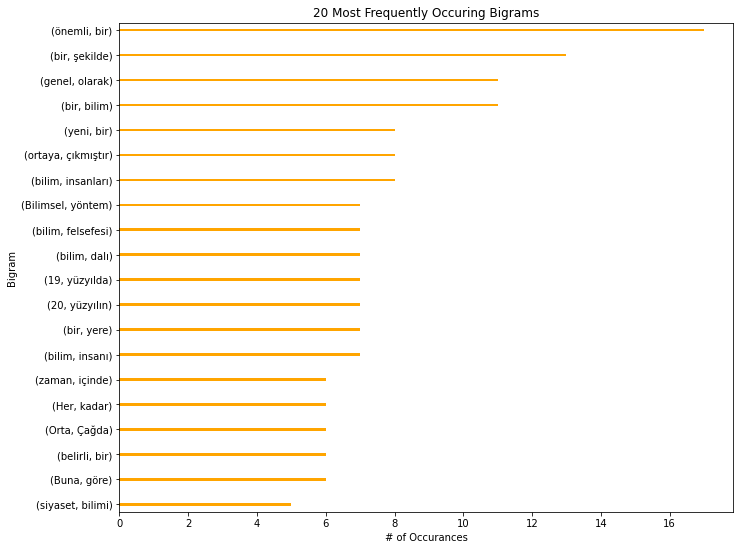

In [12]:
bigrams_series.sort_values().plot.barh(color='orange', width=.10, figsize=(11, 9))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

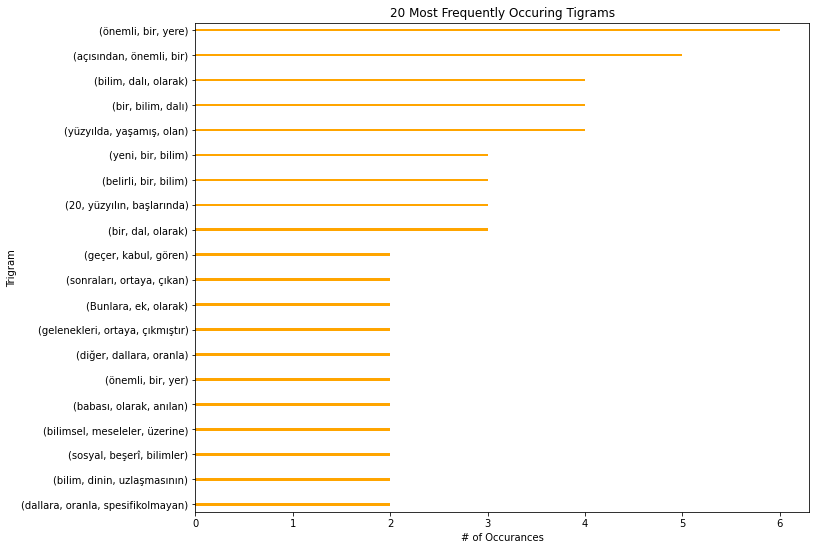

In [13]:
trigrams_series.sort_values().plot.barh(color='orange', width=.10, figsize=(11, 9))
plt.title('20 Most Frequently Occuring Tigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')